<a href="https://colab.research.google.com/github/abhaymehtre/DA1_cluster-project/blob/main/Latest_Code_of_Data_Analytics_1_Clustering__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Displaying the complete columns and Rows in the data set.
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# Imputing the Nan values
from sklearn.impute import SimpleImputer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path of the CSV File

path = '/content/drive/MyDrive/DA1 Dataset/football_data.csv'

#Reading the CSV File

football_df = pd.read_csv(path)

football_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Converting  the columns to string for striping the unwanted data.


a = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']


for i in a :

  # Converting the column data to string
  football_df[i] = football_df[i].astype(str)

  #Imputation on numeric values
  football_df[i].fillna("0", inplace = True)


  #Striping the data that is present after "+"
  football_df[i] = football_df[i].map(lambda x: x.split("+", 1)[0].rstrip())
  

In [5]:
# Imputing the Numeric values

football_df['ShortPassing'].fillna(football_df['ShortPassing'].mean(), inplace = True)
football_df['Volleys'].fillna(football_df['Volleys'].mean(), inplace = True)
football_df['Dribbling'].fillna(football_df['Dribbling'].mean(), inplace = True)
football_df['Curve'].fillna(football_df['Curve'].mean(), inplace = True)
football_df['FKAccuracy'].fillna(football_df['FKAccuracy'], inplace = True)
football_df['LongPassing'].fillna(football_df['LongPassing'].mean(), inplace = True)
football_df['BallControl'].fillna(football_df['BallControl'].mean(), inplace = True)
football_df['HeadingAccuracy'].fillna(football_df['HeadingAccuracy'].mean(), inplace = True)
football_df['Finishing'].fillna(football_df['Finishing'].mean(), inplace = True)
football_df['Crossing'].fillna(football_df['Crossing'].mean(), inplace = True)
football_df['Weight'].fillna('200lbs', inplace = True)
football_df['Contract Valid Until'].fillna(2019, inplace = True)
football_df['Height'].fillna("5'11", inplace = True)
football_df['Joined'].fillna('Jul 1, 2018', inplace = True)
football_df['Body Type'].fillna('Normal', inplace = True)
football_df['Position'].fillna('ST', inplace = True)
football_df['Club'].fillna('No Club', inplace = True)
football_df['Work Rate'].fillna('Medium/ Medium', inplace = True)
football_df['Skill Moves'].fillna(football_df['Skill Moves'].median(), inplace = True)
football_df['Weak Foot'].fillna(3, inplace = True)
football_df['Preferred Foot'].fillna('Right', inplace = True)
football_df['International Reputation'].fillna(1, inplace = True)
football_df['Wage'].fillna('€200K', inplace = True)
football_df['Release Clause'].fillna('€196.4M', inplace = True)

football_df.fillna(0, inplace = True)

football_df.isnull().sum()

Unnamed: 0                  0
ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF        

In [6]:
# Extracting the Year from the given date format for column: 'Joined'

def parse_date(s):
    if isinstance(s, str) and ',' in s:
        return float(s.split()[2])
    else:
        return int(s)
        
football_df['Joined'] = football_df['Joined'].apply(parse_date)
football_df['Contract Valid Until'] = football_df['Contract Valid Until'].apply(parse_date)


In [7]:
# converting the Body Types

football_df.loc[~football_df['Body Type'].isin(['Normal', 'Stocky', 'Lean']), 'Body Type'] = football_df['Body Type'].value_counts().index[0]
football_df['Body Type'].value_counts()

Normal    10650
Lean       6417
Stocky     1140
Name: Body Type, dtype: int64

In [8]:
# football_df.isnull().sum()

In [9]:
# Converting the height format 

football_df.replace({"Height": {"'" : "."}}, regex=True, inplace=True)

# Converting the Weight format 

football_df.replace({"Weight": {"lbs" : ""}}, regex=True, inplace=True)

In [10]:
# Converting the columns of data frame to numeric

objtofloat = ['Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',	'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

for a in objtofloat:
    football_df[a] = football_df[a].astype(float, errors = 'raise')

In [11]:
# Data Cleaned completely

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

football_df['Value'] = football_df['Value'].apply(lambda x: extract_value_from(x))
football_df['Wage'] = football_df['Wage'].apply(lambda x: extract_value_from(x))   
football_df['Release Clause'] = football_df['Release Clause'].apply(lambda x: extract_value_from(x))

In [12]:
football_df.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Normal,Yes,RF,10.0,2004.0,0,2021.0,5.70,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,Normal,Yes,ST,7.0,2018.0,0,2022.0,6.20,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Normal,Yes,LW,10.0,2017.0,0,2022.0,5.90,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2011.0,0,2020.0,6.40,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2015.0,0,2023.0,5.11,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [13]:
# Creating a copy of data frame

Actual_football_df = football_df.copy()

In [14]:
correlated_features = set()
correlation_matrix = football_df.corr()


for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [15]:
print(len(correlated_features))

print(correlated_features)

37
{'LW', 'CB', 'BallControl', 'Overall', 'LM', 'LCM', 'Interceptions', 'Dribbling', 'GKPositioning', 'LAM', 'LCB', 'RCB', 'CM', 'StandingTackle', 'RB', 'SprintSpeed', 'RM', 'ST', 'GKHandling', 'RW', 'SlidingTackle', 'RAM', 'CDM', 'GKReflexes', 'GKKicking', 'LF', 'Marking', 'CF', 'RWB', 'LB', 'RF', 'CAM', 'LDM', 'RCM', 'RDM', 'RS', 'ShortPassing'}


In [16]:
# Dropping the columns that are not required.

# Column Names: 'ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number', 'Loaned From'

football_df.drop(['ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Loaned From'], axis='columns', inplace=True)

# Below columns are highly corelated (more than 0.9). So dropping them.
football_df.drop(['LCB', 'CF', 'Overall', 'LAM', 'RAM', 'StandingTackle', 'LF', 'RF', 'LB', 'SlidingTackle', 'LCM', 'LM', 'RWB', 'RDM', 'ST', 'CAM', 'RM', 'SprintSpeed', 'BallControl', 'GKReflexes', 'CB', 'RB', 'ShortPassing', 'LDM', 'Marking', 'RS', 'GKKicking', 'RW', 'Interceptions', 'Dribbling', 'CDM', 'RCM', 'GKHandling', 'CM', 'GKPositioning', 'LW', 'RCB'], axis='columns', inplace=True)

In [17]:
football_df.isnull().sum()

Unnamed: 0                     0
Age                            0
Nationality                    0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                       0
Jersey Number                  0
Joined                         0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
LWB                         2085
Crossing                       0
Finishing                      0
HeadingAccuracy                0
Volleys                        0
Curve                          0
FKAccuracy                     0
LongPassing                    0
Acceleration                   0
Agility   

In [18]:
# Splitting the Categorical and Numerical columns

numeric_data = football_df.select_dtypes(include=['int','float'])

categorical_data = football_df.select_dtypes(include=['object'])

In [19]:
# Imputing the NAN values present in the numeric_data 

c = numeric_data.columns

c= list(c)

for i in c:

  numeric_data[i] = numeric_data[i].replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [20]:
numeric_data.head()

,Unnamed: 0,Age,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,LWB,Crossing,Finishing,HeadingAccuracy,Volleys,Curve,FKAccuracy,LongPassing,Acceleration,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Positioning,Vision,Penalties,Composure,GKDiving,Release Clause
0,0,31,94,110500000.0,565000.0,2202,5.0,4.0,4.0,10.0,2004.0,2021.0,5.70,159.0,88.0,64.0,84.0,95.0,70.0,86.0,93.0,94.0,87.0,91.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,94.0,94.0,75.0,96.0,6.0,226500000.0
1,1,33,94,77000000.0,405000.0,2228,5.0,4.0,5.0,7.0,2018.0,2022.0,6.20,183.0,91.0,65.0,84.0,94.0,89.0,87.0,81.0,76.0,77.0,89.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,95.0,82.0,85.0,95.0,7.0,127100000.0
2,2,26,93,118500000.0,290000.0,2143,5.0,5.0,5.0,10.0,2017.0,2022.0,5.90,150.0,84.0,65.0,79.0,87.0,62.0,84.0,88.0,87.0,78.0,94.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,89.0,87.0,81.0,94.0,9.0,228100000.0
3,3,27,93,72000000.0,260000.0,1471,4.0,3.0,1.0,1.0,2011.0,2020.0,6.40,168.0,0.0,0.0,17.0,13.0,21.0,13.0,21.0,19.0,51.0,57.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,12.0,68.0,40.0,68.0,90.0,138600000.0
4,4,27,92,102000000.0,355000.0,2281,4.0,5.0,4.0,7.0,2015.0,2023.0,5.11,154.0,82.0,77.0,93.0,82.0,55.0,82.0,85.0,83.0,91.0,78.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,87.0,94.0,79.0,88.0,15.0,196400000.0


In [21]:
categorical_data.head()

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,Argentina,FC Barcelona,Left,Medium/ Medium,Normal,RF
1,Portugal,Juventus,Right,High/ Low,Normal,ST
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Normal,LW
3,Spain,Manchester United,Right,Medium/ Medium,Lean,GK
4,Belgium,Manchester City,Right,High/ High,Normal,RCM


In [22]:

for col in categorical_data.columns:
    print(col)
    print("----------------------------")
    print(football_df[col].value_counts())

Nationality
----------------------------
England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
Wales                    129
Croatia                  126
Serbia                   126
Ni

**1. Data visualisation**

**Plot histograms of count of players on the basis of some attributes like height.**

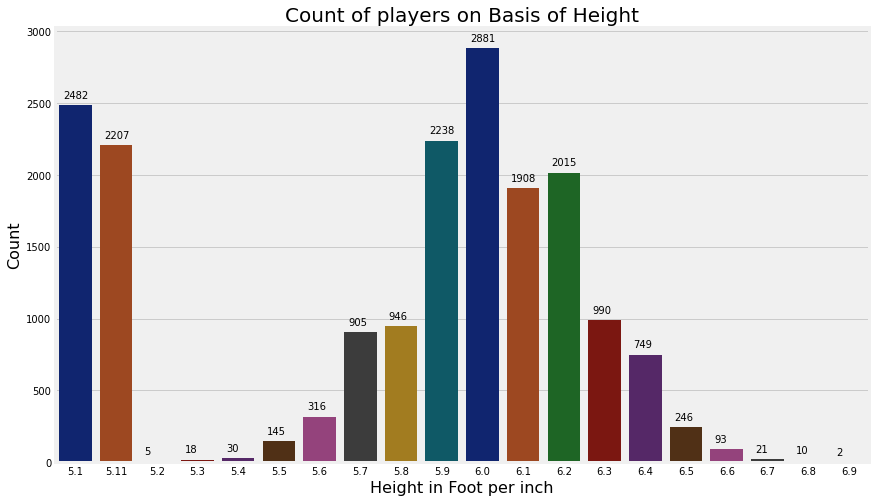

In [23]:
def snsplotting_height(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} in Foot per inch', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

    plt.show()

snsplotting_height('Height')    

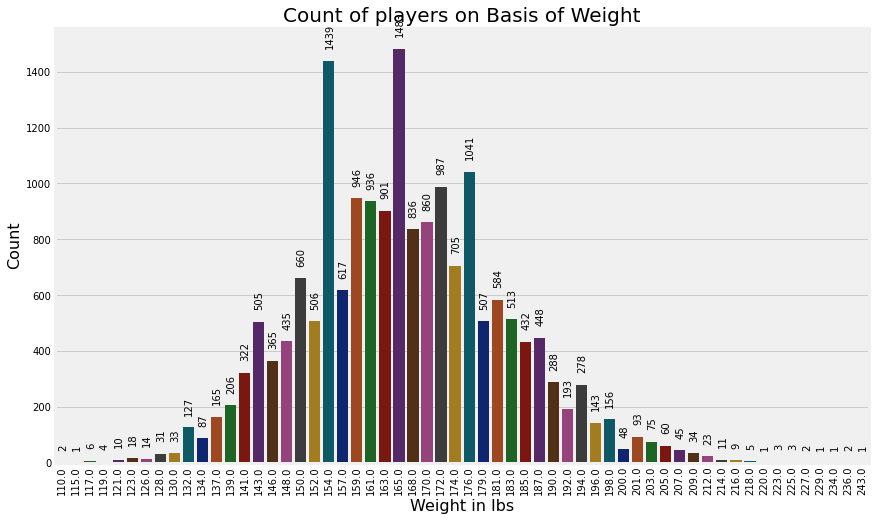

In [24]:

def snsplotting_weight(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_xlabel(xlabel = f'{name} in lbs', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),rotation=90)


    plt.show()

snsplotting_weight('Weight') 

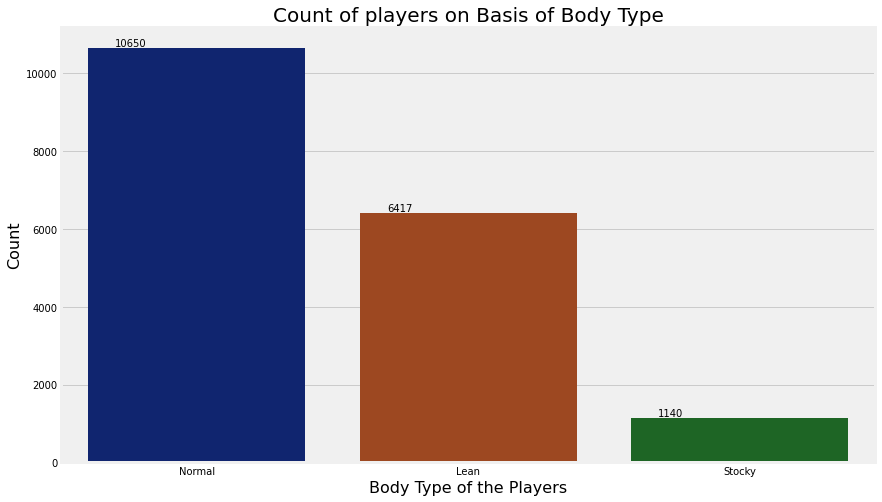

In [25]:
def snsplotting_bodyType(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} of the Players', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

snsplotting_bodyType('Body Type') 

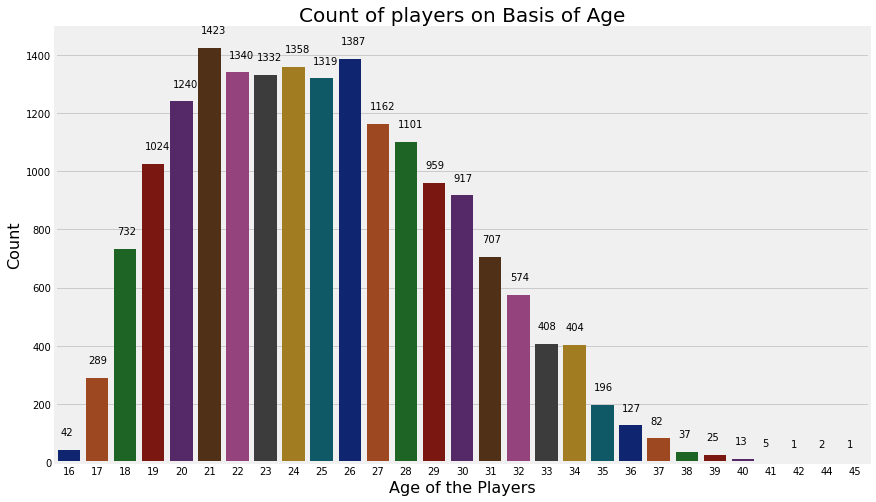

In [26]:
def snsplotting_age(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} of the Players', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

snsplotting_age('Age') 

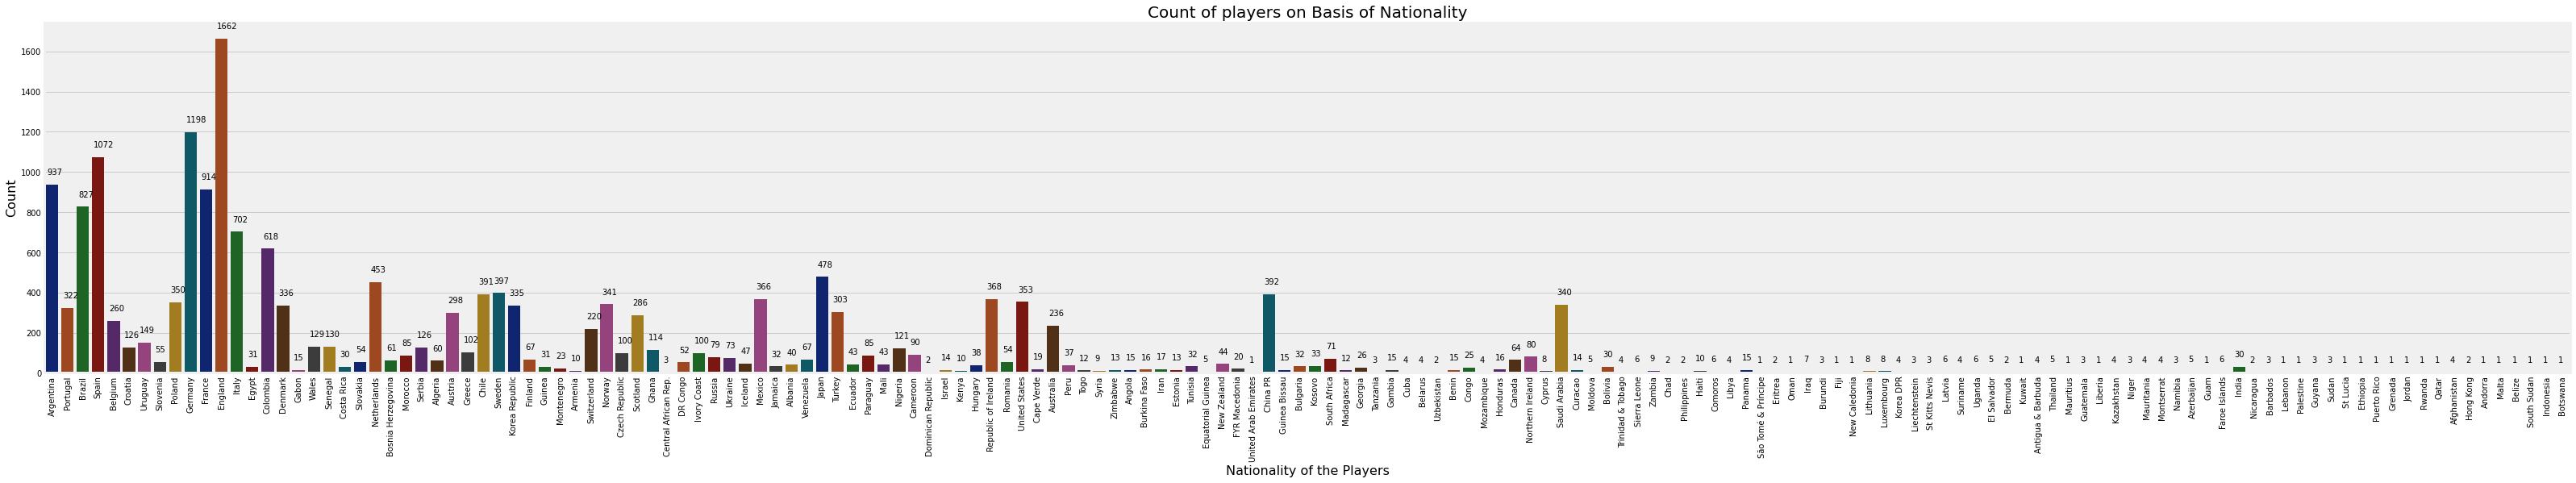

In [27]:
# Plotting the Nationality of the Players

def snsplotting_Nationality(name): 
    plt.figure(figsize = (50, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} of the Players', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

snsplotting_Nationality('Nationality') 

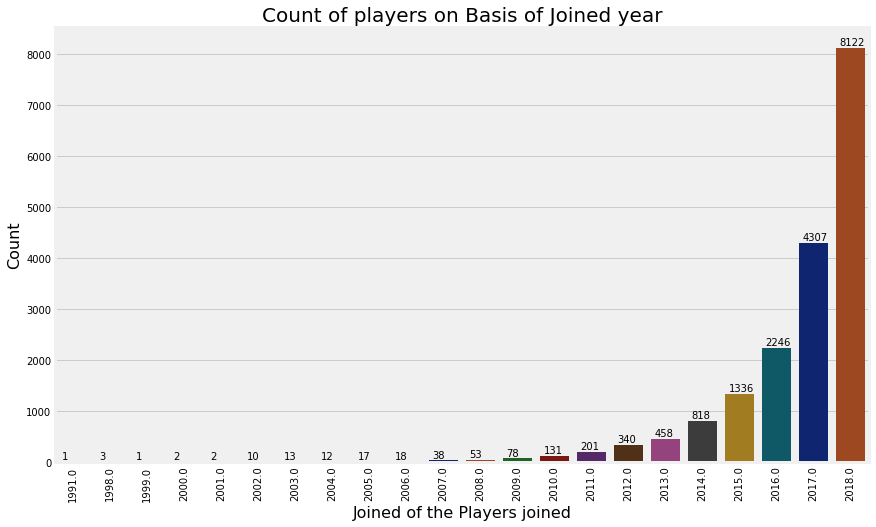

In [28]:
def snsplotting_joined(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name} year', fontsize = 20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_xlabel(xlabel = f'{name} of the Players joined', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

snsplotting_joined('Joined') 

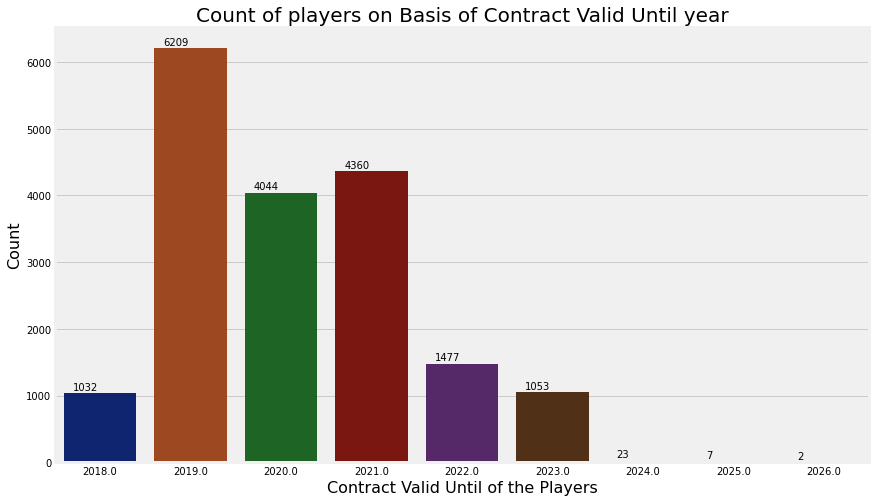

In [29]:
def snsplotting_Contract_Valid_Until(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name} year', fontsize = 20)
    # ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_xlabel(xlabel = f'{name} of the Players', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

snsplotting_Contract_Valid_Until('Contract Valid Until') 

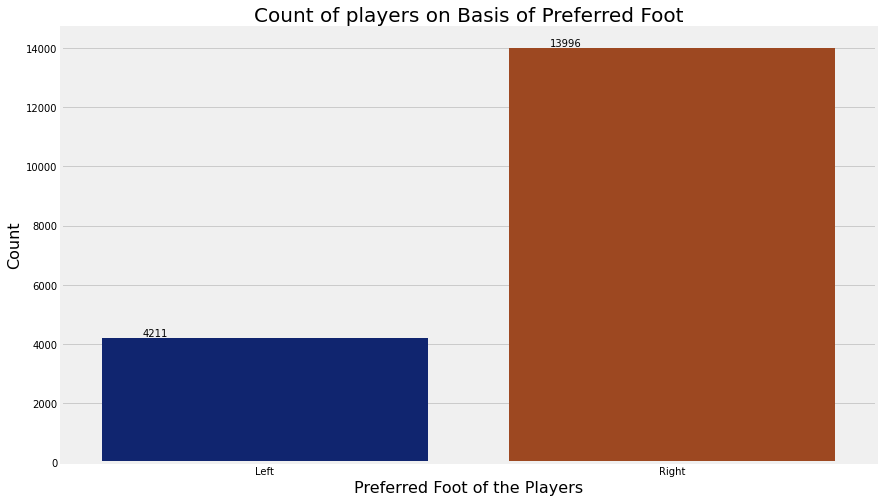

In [30]:
# Prefered foot of the players

def snsplotting_Contract_Valid_Until(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} of the Players', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)

    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

snsplotting_Contract_Valid_Until('Preferred Foot') 

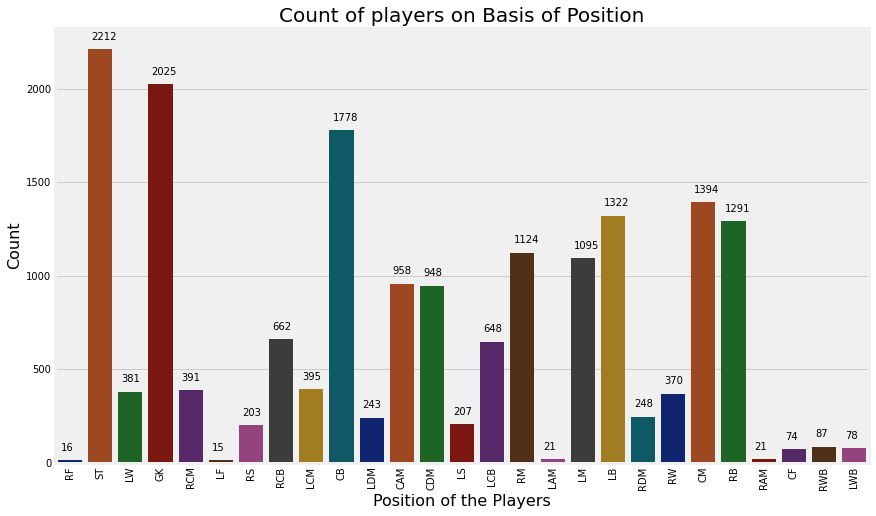

In [31]:
# Position of the players

def snsplotting_Contract_Valid_Until(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = Actual_football_df, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_xlabel(xlabel = f'{name} of the Players', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    for p in ax.patches:
       ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    plt.show()

snsplotting_Contract_Valid_Until('Position') 

**Distribution of players in different clubs/country on the basis of some attribute**

In [32]:
# Getting the Country wide list of players

def nationality(x):
    return Actual_football_df[Actual_football_df['Nationality'] == x][['Name','Overall','Potential','Position']]


# Apply for Loop for all the countries.

nationality('India')


,Name,Overall,Potential,Position
8605,S. Chhetri,67,67,LS
10011,S. Jhingan,65,71,RCB
12598,J. Lalpekhlua,63,64,RS
12811,G. Singh Sandhu,63,68,GK
13508,A. Edathodika,62,62,LCB
14054,P. Halder,61,67,RCM
14199,P. Kotal,61,66,RB
14218,L. Ralte,61,62,LW
14705,N. Das,60,65,LB
14786,U. Singh,60,67,RM


In [33]:
Actual_football_df.shape

(18207, 89)

In [34]:
football_df.shape


(18207, 45)

**Features of players according to their position.**

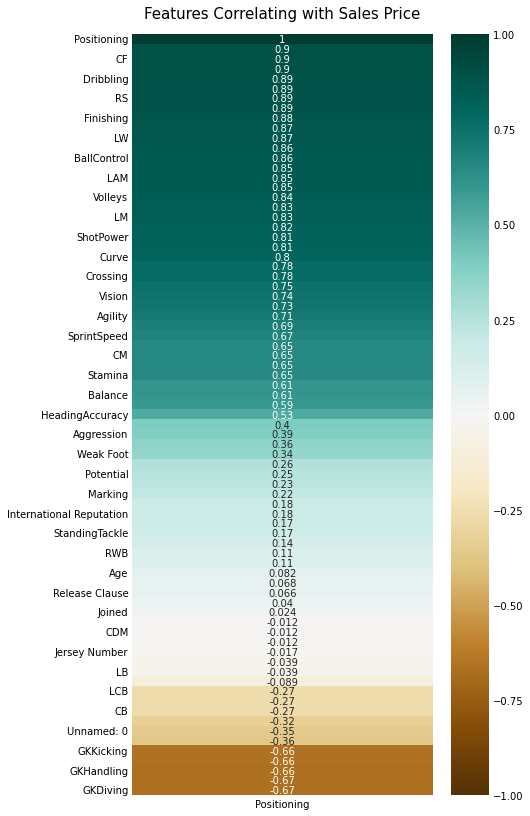

In [35]:

plt.figure(figsize=(6, 14))
heatmap = sns.heatmap(Actual_football_df.corr()[['Positioning']].sort_values(by='Positioning', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':15}, pad=16);


In [36]:
## We are considering the feature that are having the corelation between 0.5 to 0.8

feature_list = ['Balance', 'Stamina', 'CM', 'Agility', 'Vision', 'Crossing']

**Can you use visualisation techniques to find outliers**

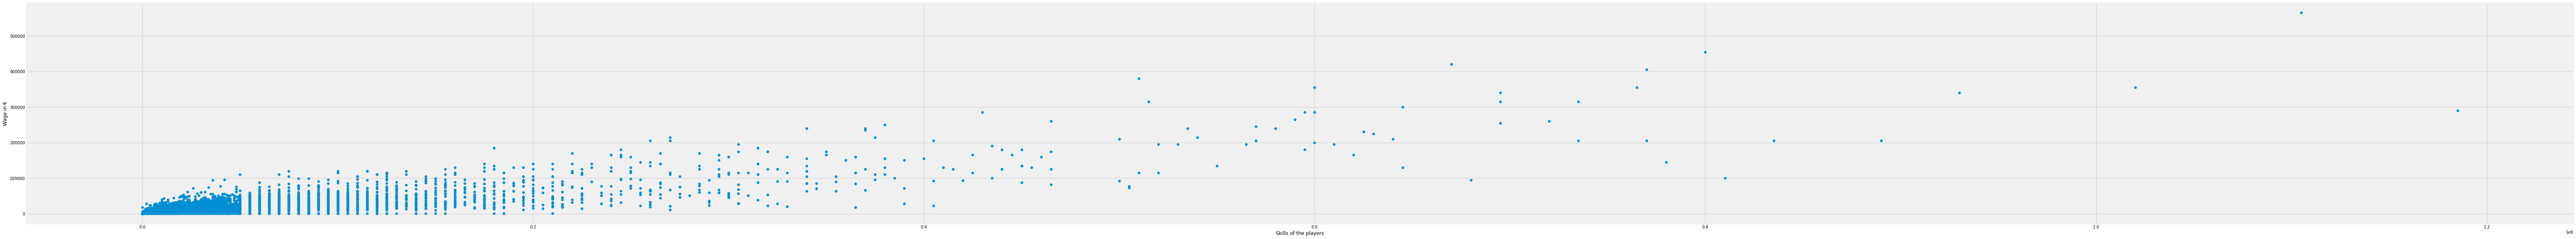

In [37]:
# Scatter plot for finding the outliers of the players

fig, ax = plt.subplots(figsize = (100,10))
ax.scatter(Actual_football_df['Value'], Actual_football_df['Wage'])
 
# x-axis label
ax.set_xlabel('Skills of the players')
 
# y-axis label
ax.set_ylabel('Wage in €')
plt.show()

In [38]:
numeric_data.head() 

,Unnamed: 0,Age,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,LWB,Crossing,Finishing,HeadingAccuracy,Volleys,Curve,FKAccuracy,LongPassing,Acceleration,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Positioning,Vision,Penalties,Composure,GKDiving,Release Clause
0,0,31,94,110500000.0,565000.0,2202,5.0,4.0,4.0,10.0,2004.0,2021.0,5.70,159.0,88.0,64.0,84.0,95.0,70.0,86.0,93.0,94.0,87.0,91.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,94.0,94.0,75.0,96.0,6.0,226500000.0
1,1,33,94,77000000.0,405000.0,2228,5.0,4.0,5.0,7.0,2018.0,2022.0,6.20,183.0,91.0,65.0,84.0,94.0,89.0,87.0,81.0,76.0,77.0,89.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,95.0,82.0,85.0,95.0,7.0,127100000.0
2,2,26,93,118500000.0,290000.0,2143,5.0,5.0,5.0,10.0,2017.0,2022.0,5.90,150.0,84.0,65.0,79.0,87.0,62.0,84.0,88.0,87.0,78.0,94.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,89.0,87.0,81.0,94.0,9.0,228100000.0
3,3,27,93,72000000.0,260000.0,1471,4.0,3.0,1.0,1.0,2011.0,2020.0,6.40,168.0,0.0,0.0,17.0,13.0,21.0,13.0,21.0,19.0,51.0,57.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,12.0,68.0,40.0,68.0,90.0,138600000.0
4,4,27,92,102000000.0,355000.0,2281,4.0,5.0,4.0,7.0,2015.0,2023.0,5.11,154.0,82.0,77.0,93.0,82.0,55.0,82.0,85.0,83.0,91.0,78.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,87.0,94.0,79.0,88.0,15.0,196400000.0




**3. Hierarchical Clustering**

**1. Cluster the data using any Agglomerative(bottom-up strategy) method of your choice.**

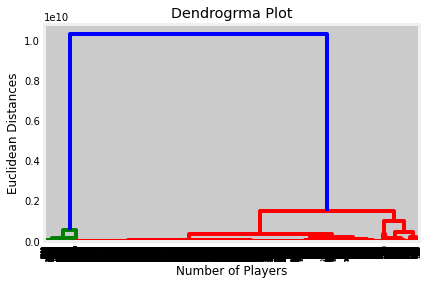

In [39]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  

dendro = shc.dendrogram(shc.linkage(numeric_data, method="ward"))  
# plt.figure(figsize = (13, 8))
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Number of Players")  
plt.show()  


In [40]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(numeric_data)  

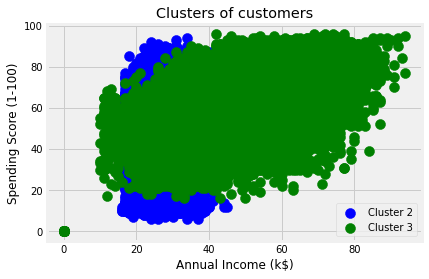

In [41]:
#visulaizing the clusters  
plt.scatter(numeric_data['Age'], numeric_data['Curve'], s = 100, c = 'blue', label = 'Cluster 2')  
plt.scatter(numeric_data['Vision'], numeric_data['Balance'], s = 100, c = 'green', label = 'Cluster 3')  
# plt.scatter(numeric_data[y_pred== 2, 0], numeric_data[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
# plt.scatter(numeric_data[y_pred == 3, 0], numeric_data[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
# plt.scatter(numeric_data[y_pred == 4, 0], numeric_data[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

4. DBSCAN Algorithm

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# numeric_data = normalize(numeric_data)

abc = MinMaxScaler()
numeric_data = abc.fit_transform(numeric_data)

np_array = np.array(numeric_data)

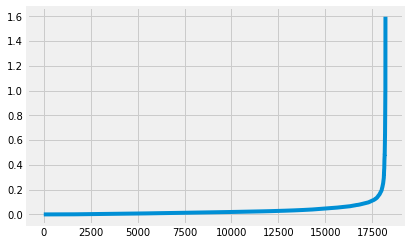

In [50]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(np_array)
distances, indices = nbrs.kneighbors(np_array)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


# The optimal value for epsilon will be found at the point of maximum curvature.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


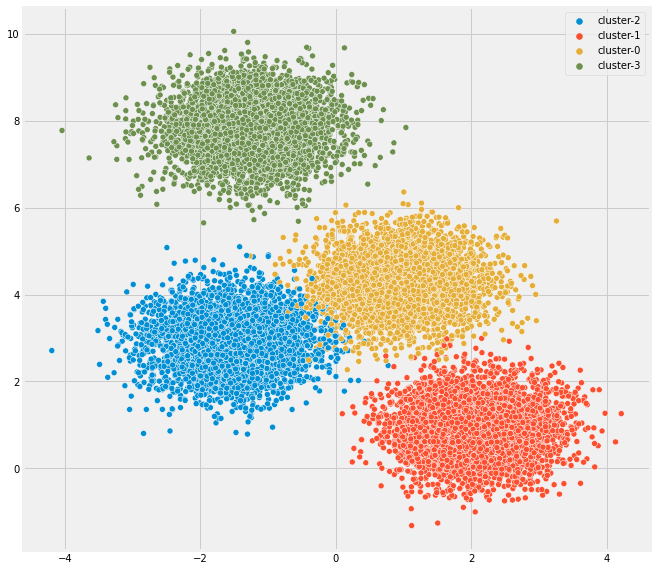

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns
db = DBSCAN(eps=0.3, metric='euclidean', algorithm='auto')  
y_pred= db.fit_predict(numeric_data)
X, labels_true = make_blobs(n_samples=18207, centers=4, cluster_std=0.60, random_state=0)



fig = plt.figure(figsize=(10, 10))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

# Here I have created the 3 blobs of data based on the my dataset.



1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.3333333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.25


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.16666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.14285714285714285


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.1111111111111111


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


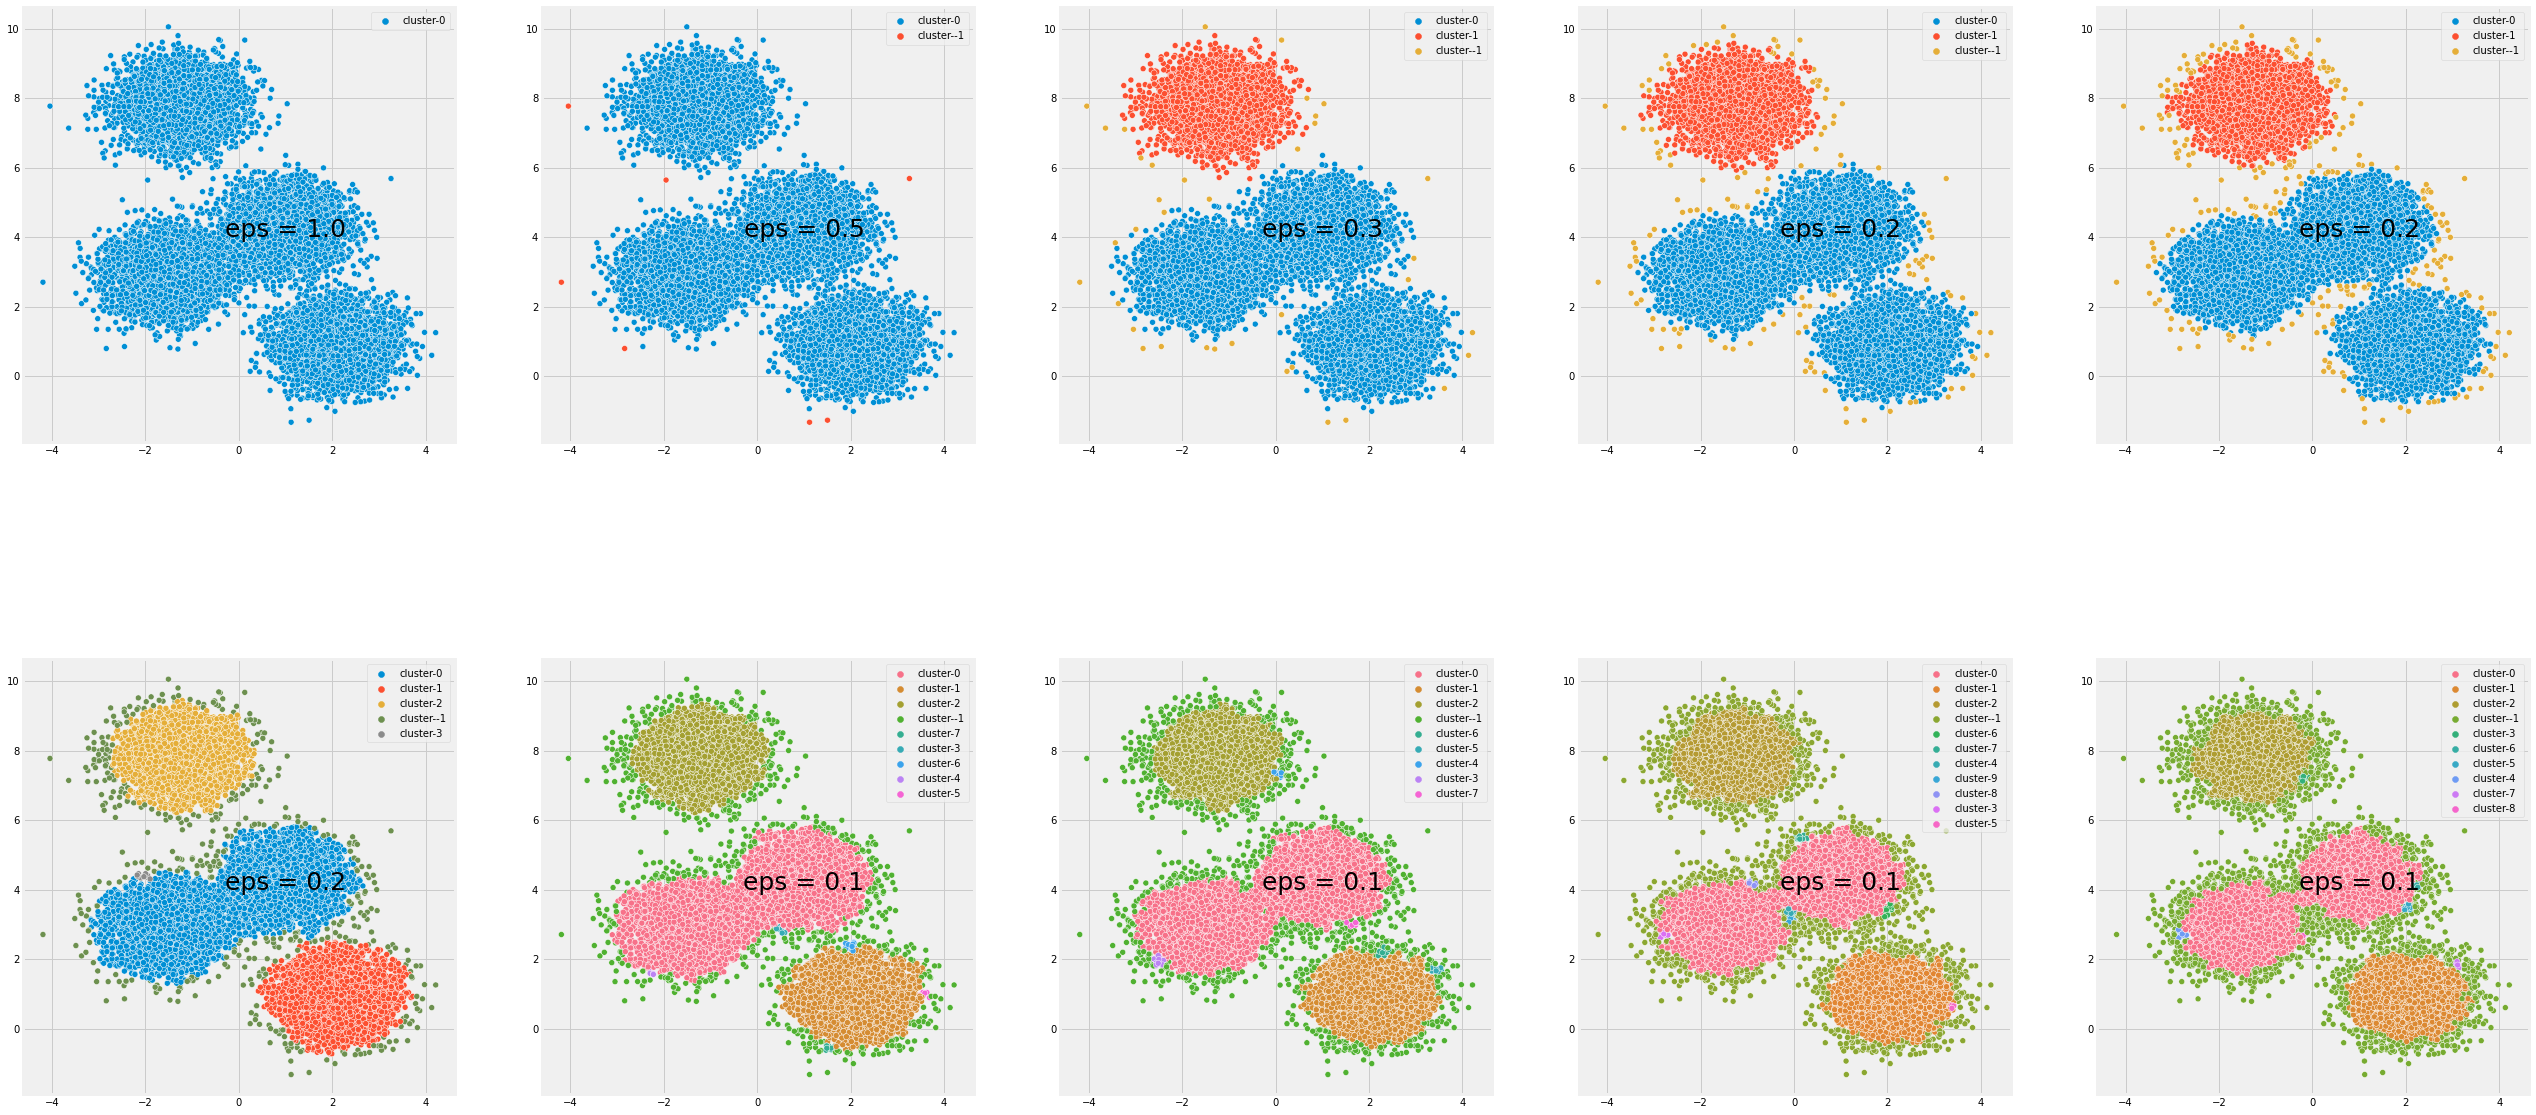

In [60]:
fig = plt.figure(figsize=(40, 20))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1


# After the comparison, I come to a conclustion that the range of eps which is 0.3 is final epsilon and the minPts are depicted on the plot as mentioned below.

